# Optimisation Example with JEA and JESS API
This notebook shows a simple example of running optimisation using the [JEA Engine API](https://www.jeplus.org/wiki/doku.php?id=docs:jea:start "Go to JEA API docs") and the [JESS Service API](https://www.jeplus.org/wiki/doku.php?id=docs:jess:start "Go to JESS API docs"). Documentation of the service and the API are still under development. This demo can be used as a quick start guide.

Let's start with loading the necessary package and testing the connection to the server. The "[Requests: HTTP for Humans](http://python-requests.org "Go to Python Requests website")" is shown here, although other http packaages can be used too. 

After loading the Request package, we can run the Info command. Info is the simplest command and does not require authentication, so it works also if you copy and paste the URL to a browser, or [click here](https://api.ensims.com/jea_web/api/info "Try Info command in browser").

In [1]:
# Use requests (see https://requests.readthedocs.io/en/master/)
import requests

# API endpoint URL
ApiBase = 'https://api.ensims.com/'
JeaApi = ApiBase + "jea_web/api/"
UserApi = ApiBase + 'users/api/'

# Test connection
r = requests.get(JeaApi + 'info')

Requests will make a GET request to the given URL, and store the returned data in 'r'. We can see the contents of 'r' in text form:

In [2]:
print(r.text)

{
  "Title" : "JEA Engine/API",
  "Description" : "an optimisation service provided by ENSIMS Ltd.",
  "Major" : 1,
  "Minor" : 0,
  "Revision" : 2,
  "Release" : "stable",
  "Update" : 0,
  "Notice" : "(C) 2016 - 2019, Energy Simulation Solutions Ltd. All rights reserved."
}


Or see it as a data object using the 'json()' function. Most of the JEA API commands accepts and returns data in JSON format.

In [3]:
r.json()

{'Title': 'JEA Engine/API',
 'Description': 'an optimisation service provided by ENSIMS Ltd.',
 'Major': 1,
 'Minor': 0,
 'Revision': 2,
 'Release': 'stable',
 'Update': 0,
 'Notice': '(C) 2016 - 2019, Energy Simulation Solutions Ltd. All rights reserved.'}

Since it is an object, you can of course access any of its fields such as here:

In [4]:
r.json()['Title']

'JEA Engine/API'

## Authentication

To use JEA, you need an account on the ENSIMS web service system. It is easy to create one at [app.ensims.com](https://app.ensims.com/?user=register "Go to app.ensims.com").

Once we've got an account, we can log on to the JEA Web platform. More details of the authentication and account commands are available in the Users_API example notebook and the releveant documentation. Here, we just log on using the existing credential and then store the cookies. 

The Log on command is a POST request with appropriate headers and the user credentials in JSON format as the data body. Here is how you do it. **Remember to replace the email field with your own.**

In [2]:
# Get log in credential
import getpass
user_email = "yi@jeplus.org"  # <== Change this to your registered email
password = getpass.getpass("Password for " + user_email + ": ")

# Set header and body of the POST request
headers = {'Content-Type': 'application/json'}
body = {"email": user_email, "password": password}

# Send request
r = requests.post(UserApi + 'auth', headers=headers, json=body)

# Keep the cookies
cookies = r.cookies

# Check data returned by JEA
r.json()

Password for yi@jeplus.org:  ········


{'ok': True,
 'status': 'Logged in successfully!',
 'jwt': 'Session token in cookie',
 'user': 'Yi',
 'role': 'pro',
 'email': 'yi@jeplus.org'}

In most JEA commands, the JWT key must be sent as a cookie named 'session_token' along the request. The easiest way is to include 'cookies' in the request, which is shown below as an example. The Check-in command is for testing the validity of the current session token. If the existing key is valid, the request returns a new key. So, remember to update the stored cookies.

In [6]:
headers = {}
body = {}

# Check-in
r = requests.post(UserApi + 'checkin', headers=headers, json=body, cookies=cookies)

# Update the copy of the key
cookies = r.cookies

# Show the response
r.json()


{'ok': True,
 'status': 'Session renewed successfully!',
 'jwt': 'Session key cookie',
 'user': 'Yi',
 'role': 'user',
 'email': 'yi@jeplus.org'}

## Create New Project

Now, let's try create a new JEA project. The details of the "Create" command ('circle' example is shown below) can be found in the [API docs](http://www.jeplus.org/wiki/doku.php?id=docs:jea:create_project "Go to docs on the Create command").

In [4]:
body = {
    "command": "Create",
    "projectID": "circle-py-bcu",
    "problem": {
        "name": "circle",
        "description": "Test constrained mo fucntion with two variables",
        "variables": [
            {
                "name": "x",
                "caption": "x in [0, 1]",
                "valueStr": "[0:0.01:1]",
                "maskStr": "[0:0.1:1]",
                "valueType": "Number"
            },
            {
                "name": "y",
                "caption": "y in [0, 1]",
                "valueStr": "[0:0.01:1]",
                "maskStr": "[0:0.1:1]",
                "valueType": "Number"
            }
        ],
        "evalResults": [
            {
                "name": "f1",
                "caption": "Evaluation f1 = 100 * x",
                "unit": "-"
            },
            {
                "name": "f2",
                "caption": "Evaluation f2 = 100 * y",
                "unit": "-"
            }
        ],
        "userMetrics": [],
        "objectives": [
            {
                "name": "t1",
                "caption": "Objective t1 = f1",
                "unit": "-",
                "direction": "Minimize",
                "formula": "f1"
            },
            {
                "name": "t2",
                "caption": "Objective t2 = f2",
                "unit": "-",
                "direction": "Minimize",
                "formula": "f2"
            }
        ],
        "constraints": [
            {
                "name": "s1",
                "caption": "Constraint s1 <= 30",
                "unit": "-",
                "formula": "Math.sqrt(Math.pow(f1-50, 2) + Math.pow(f2-50, 2))",
                "lb": 0,
                "ub": 30,
                "min": 0,
                "max": 100,
                "weight": 1
            }
        ]
    },
    "config": {
        "algorithm": "Parametrics",
        "sampleSize": 0,
        "initSampleOption": "RANDOM",
        "initPopSize": 10,
        "evolvePopSize": 10,
        "maxPopSize": 10000,
        "mutationRate": 0.2,
        "crossoverRate": 1,
        "tournamentSize": 2,
        "objectiveBias": 0,
        "elitismTolerance": 0,
        "maxGenerations": 100,
        "maxEvaluations": 1000,
        "maxComputingTime": 100,
        "maxWallTime": 24
    },
    "smdata": {
        "modelID": "circle",
        "model": "",
        "type": "Python3"
    }
}

# Send command
r = requests.post(JeaApi + 'command', json=body, cookies=cookies)

# Show response
r.json()

{'description': 'EA engine created for project circle-py-bcu', 'ok': True}

If the "Create" command is successful, JEA returns an acknowledgement with the status 'ok', and some text info on the outcome.

If the project is created successfully, we can check its status any time by issuing the "Status" command.

In [5]:
# Check status
project_id = 'circle-py-bcu'
r = requests.get(JeaApi + 'status/' + project_id, cookies=cookies)

# Show the returned status
r.json()

{'status': 'Created',
 'solutions': 0,
 'projectName': 'circle-py-bcu',
 'currentRun': -1,
 'generations': 0,
 'description': 'Project circle-py-bcu has been created and configured.',
 'ok': True}

You can start, pause, resume, terminate, cancel, delete the project with ease. Here is how you start a project. Note that 'project_id' is already assigned in the previous cell. 

In [6]:
# Get the status of the project
r = requests.get(JeaApi + 'start/' + project_id, cookies=cookies)

# Show the returned status
r.json()

{'description': 'EA engine for project circle-py-bcu is launched.', 'ok': True}

## Run Simulations

The JEA Engine does not run simulations. In fact, it does not even know what model you are using. If you look at the 'smdata' field in the "Create" command above, all the information you have provided to the server is the model's name and type. In order to get the project going, you need to manage the simulation runs yourself.

Should it be a parametric or an optimisation project, JEA explores the cases iteratively. In each generation, a number of cases will be proposed by JEA's algorithm. You need to go retrieve the pending cases, run them through the model, and submit the results.

Let's first define the model for this example. As defined in the "Create" command, the model should take input with values 'x' and 'y', and produce output with values 'f1' and 'f2'. We can make a function to do this.

In [7]:
def model(vars):
    results = {}
    results['f1'] = float(vars['x']) * 100
    results['f2'] = float(vars['y']) * 100
    return results

# A quick test
vars = {'x' : 0.1, 'y': 0.2}
model(vars)

{'f1': 10.0, 'f2': 20.0}

It works; good! Note that in the function, we have coerced the fields of 'vars' to float. This is because all the **variable values come from JEA are in String form** by default. This can be seen in the retrieved case data below. Now, let's retrieve the pending cases from the server...

In [12]:
# Get pending cases
r = requests.get(JeaApi + 'jobs/' + project_id, cookies=cookies)

# Show the returned cases
r.json()

{'projectName': 'circle-py-bcu',
 'jobSet': {'C-70_100': {'x': '0.70', 'y': '1.00'},
  'C-60_90': {'x': '0.60', 'y': '0.90'},
  'C-20_60': {'x': '0.20', 'y': '0.60'},
  'C-80_100': {'x': '0.80', 'y': '1.00'},
  'C-0_60': {'x': '0', 'y': '0.60'},
  'C-50_20': {'x': '0.50', 'y': '0.20'},
  'C-20_30': {'x': '0.20', 'y': '0.30'},
  'C-0_80': {'x': '0', 'y': '0.80'},
  'C-50_50': {'x': '0.50', 'y': '0.50'},
  'C-90_50': {'x': '0.90', 'y': '0.50'}},
 'name': 'Gen-1',
 'eventType': 'Request'}

Run each case through the model...

In [13]:
# Loop through the cases and put model output in 'resultSet'
cases = r.json()['jobSet']
resultSet = {}
for key, value in cases.items():
    resultSet[key] = model(value)

# Check calculation results
resultSet

{'C-70_100': {'f1': 70.0, 'f2': 100.0},
 'C-60_90': {'f1': 60.0, 'f2': 90.0},
 'C-20_60': {'f1': 20.0, 'f2': 60.0},
 'C-80_100': {'f1': 80.0, 'f2': 100.0},
 'C-0_60': {'f1': 0.0, 'f2': 60.0},
 'C-50_20': {'f1': 50.0, 'f2': 20.0},
 'C-20_30': {'f1': 20.0, 'f2': 30.0},
 'C-0_80': {'f1': 0.0, 'f2': 80.0},
 'C-50_50': {'f1': 50.0, 'f2': 50.0},
 'C-90_50': {'f1': 90.0, 'f2': 50.0}}

Excellent! Now we can build the data for submission...

In [14]:
received = r.json()
body = {'name': received['name'],
        'projectName': received['projectName'],
        'resultSet': resultSet}

# Submit results
r = requests.post(JeaApi + 'eval', json=body, cookies=cookies)

# Check server's return
r.json()

{'description': 'Evaluation results set. ', 'ok': True}

Check the status of the project again, you will see the project is now progressing. 

In [15]:
# Get the status of the project
r = requests.get(JeaApi + 'status/' + project_id, cookies=cookies)

# Show the returned status
r.json()

{'status': 'Evolving',
 'solutions': 20,
 'projectName': 'circle-py-bcu',
 'currentRun': 0,
 'generations': 2,
 'description': 'Engine is running. Current generation: 1, solutions explored: 20',
 'ok': True}

We can run the above four cells (13 - 16) a few more times to explore more points. Or to write a loop and do these automatically.

## Get Project Data

You can retrieve the project data, including the details of the explored cases, at any time. There are various commands available. Please refer to the [docs](http://www.jeplus.org/wiki/doku.php?id=docs:jea:jea_api#summary "Go to JEA docs") for more details. 

Here is the "Data" command for getting the full data set about the project from the server.

In [16]:
# Get the full data set of the project 
r = requests.get(JeaApi + 'data/' + project_id, cookies=cookies)

# Check the received data
# r.json()

If you uncomment the 'r.json()' line above, you will see that there is quite a lot of information coming from the server! Well, let's make a chart to see the explored cases.

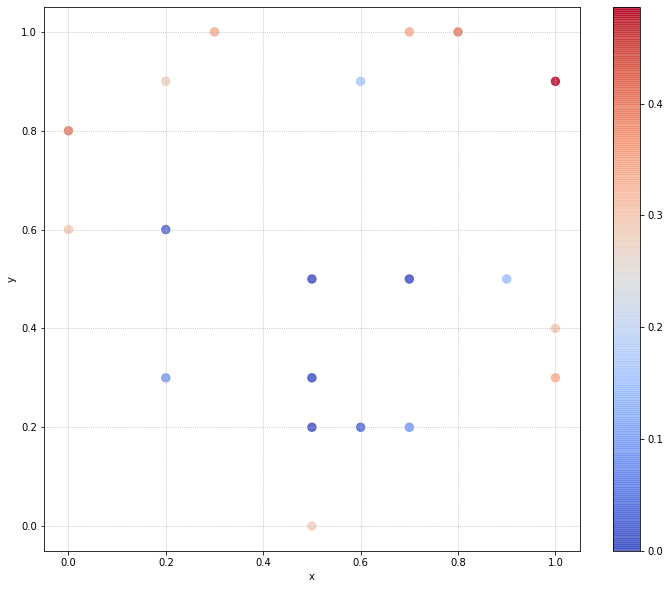

In [17]:
# Get the list of solutions
data=r.json()['solutions']

# Need NumPy
import numpy as np

# Should this be so complex?
array = np.array([], dtype=[('title', str), ('x', float), ('y', float), ('t1', float), ('t2', float), ('s1', float)])
for key, value in data.items() :
    array = np.append(array, np.array([tuple([key, float(value['variables']['x']), float(value['variables']['y']), value['metrics']['t1'], value['metrics']['t2'], value['metrics']['_s1']])], dtype=array.dtype), axis = 0)

# Now load MatplotLib
import matplotlib.pyplot as plt
fig_size = [12, 10]
plt.rcParams["figure.figsize"] = fig_size
plt.rcParams["grid.linestyle"] = ":"

# Create plot, with infeasibility shown on color scale
x = array['x']
y = array['y']
colors = array['s1']

sc = plt.scatter(x, y, s=70, c=colors, alpha=0.8, cmap='coolwarm')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.colorbar(sc)
plt.show()

Once the data are here, there are many ways to visualize them. So, have fun!

## End of Demo